<a href="https://colab.research.google.com/github/Nikhil07-source/Machine_Learning_Algorithms/blob/main/Decision_Tree_Algo_(Using_Gini).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Nikhil07-source/Datasets/refs/heads/main/diabetes.csv')
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [2]:
df.shape

(768, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
df.Outcome.value_counts()

,count
Outcome,
0,500
1,268


In [8]:
df.Outcome.value_counts(normalize=True) #Used for getting percentage

#0 = 65.1% = Majority Class
#1 = 34.8% = Minority Class

,proportion
Outcome,
0,0.651042
1,0.348958


In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

y = df[['Outcome']]

In [11]:
from sklearn.model_selection import train_test_split  #using sklearn library to split dataframe in train and test.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

print('X Train shape: ', X_train.shape)
print('X Test shape: ', X_test.shape)
print('y Train shape: ', y_train.shape)
print('y Test shape: ', y_test.shape)

X Train shape:  (614, 8)
X Test shape:  (154, 8)
y Train shape:  (614, 1)
y Test shape:  (154, 1)


In [12]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [13]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


## Decision tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(  criterion='entropy') #Training the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [15]:
#importing confusing matrix
from sklearn.metrics import confusion_matrix, classification_report #classification_report is for getting accuracy,precesion,recall etc.

In [16]:
prediction_train = dt.predict(X_train)

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
# Doing prediction and evaluation on Train Data
# Actual value = y_train
# Prediction value = prediction_train

print(confusion_matrix(y_train,prediction_train))
print('*******************************************')
print(classification_report(y_train,prediction_train))

[[404   0]
 [  0 210]]
*******************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       404
           1       1.00      1.00      1.00       210

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [19]:
# Doing prediction and evaluation on Test Data
# Actual value = y_test
# Prediction value = prediction_test

prediction_test = dt.predict(X_test)

print("**********Confusion Matrix**********")
print(confusion_matrix(y_test,prediction_test))

print("**********Classification Report**********")
print(classification_report(y_test, prediction_test))

**********Confusion Matrix**********
[[73 23]
 [24 34]]
**********Classification Report**********
              precision    recall  f1-score   support

           0       0.75      0.76      0.76        96
           1       0.60      0.59      0.59        58

    accuracy                           0.69       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.69      0.69      0.69       154



## Plotting a Decision Tree

In [20]:
from sklearn import tree

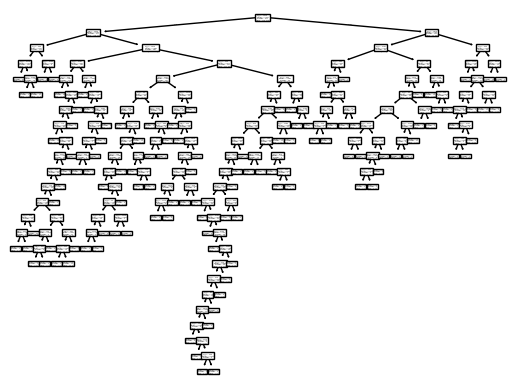

In [21]:
tree.plot_tree(dt);

# Here the model is overfitted means in Train we have accuracy of 100% and in Test we have accuracy of 69%.
# So there in 31% of difference between Train & Test Accuracy.
# Model in which Train Accuracy is higher then Test Accuracy is known as Overfitting.
# This model is too complex as we can see the tree is too complex below.
# We have to make this model simple to get simple tree

## Making Decision Tree simple.

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(  criterion='entropy', max_depth=3) #Depth (generation) means branches coming out from Parent.
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

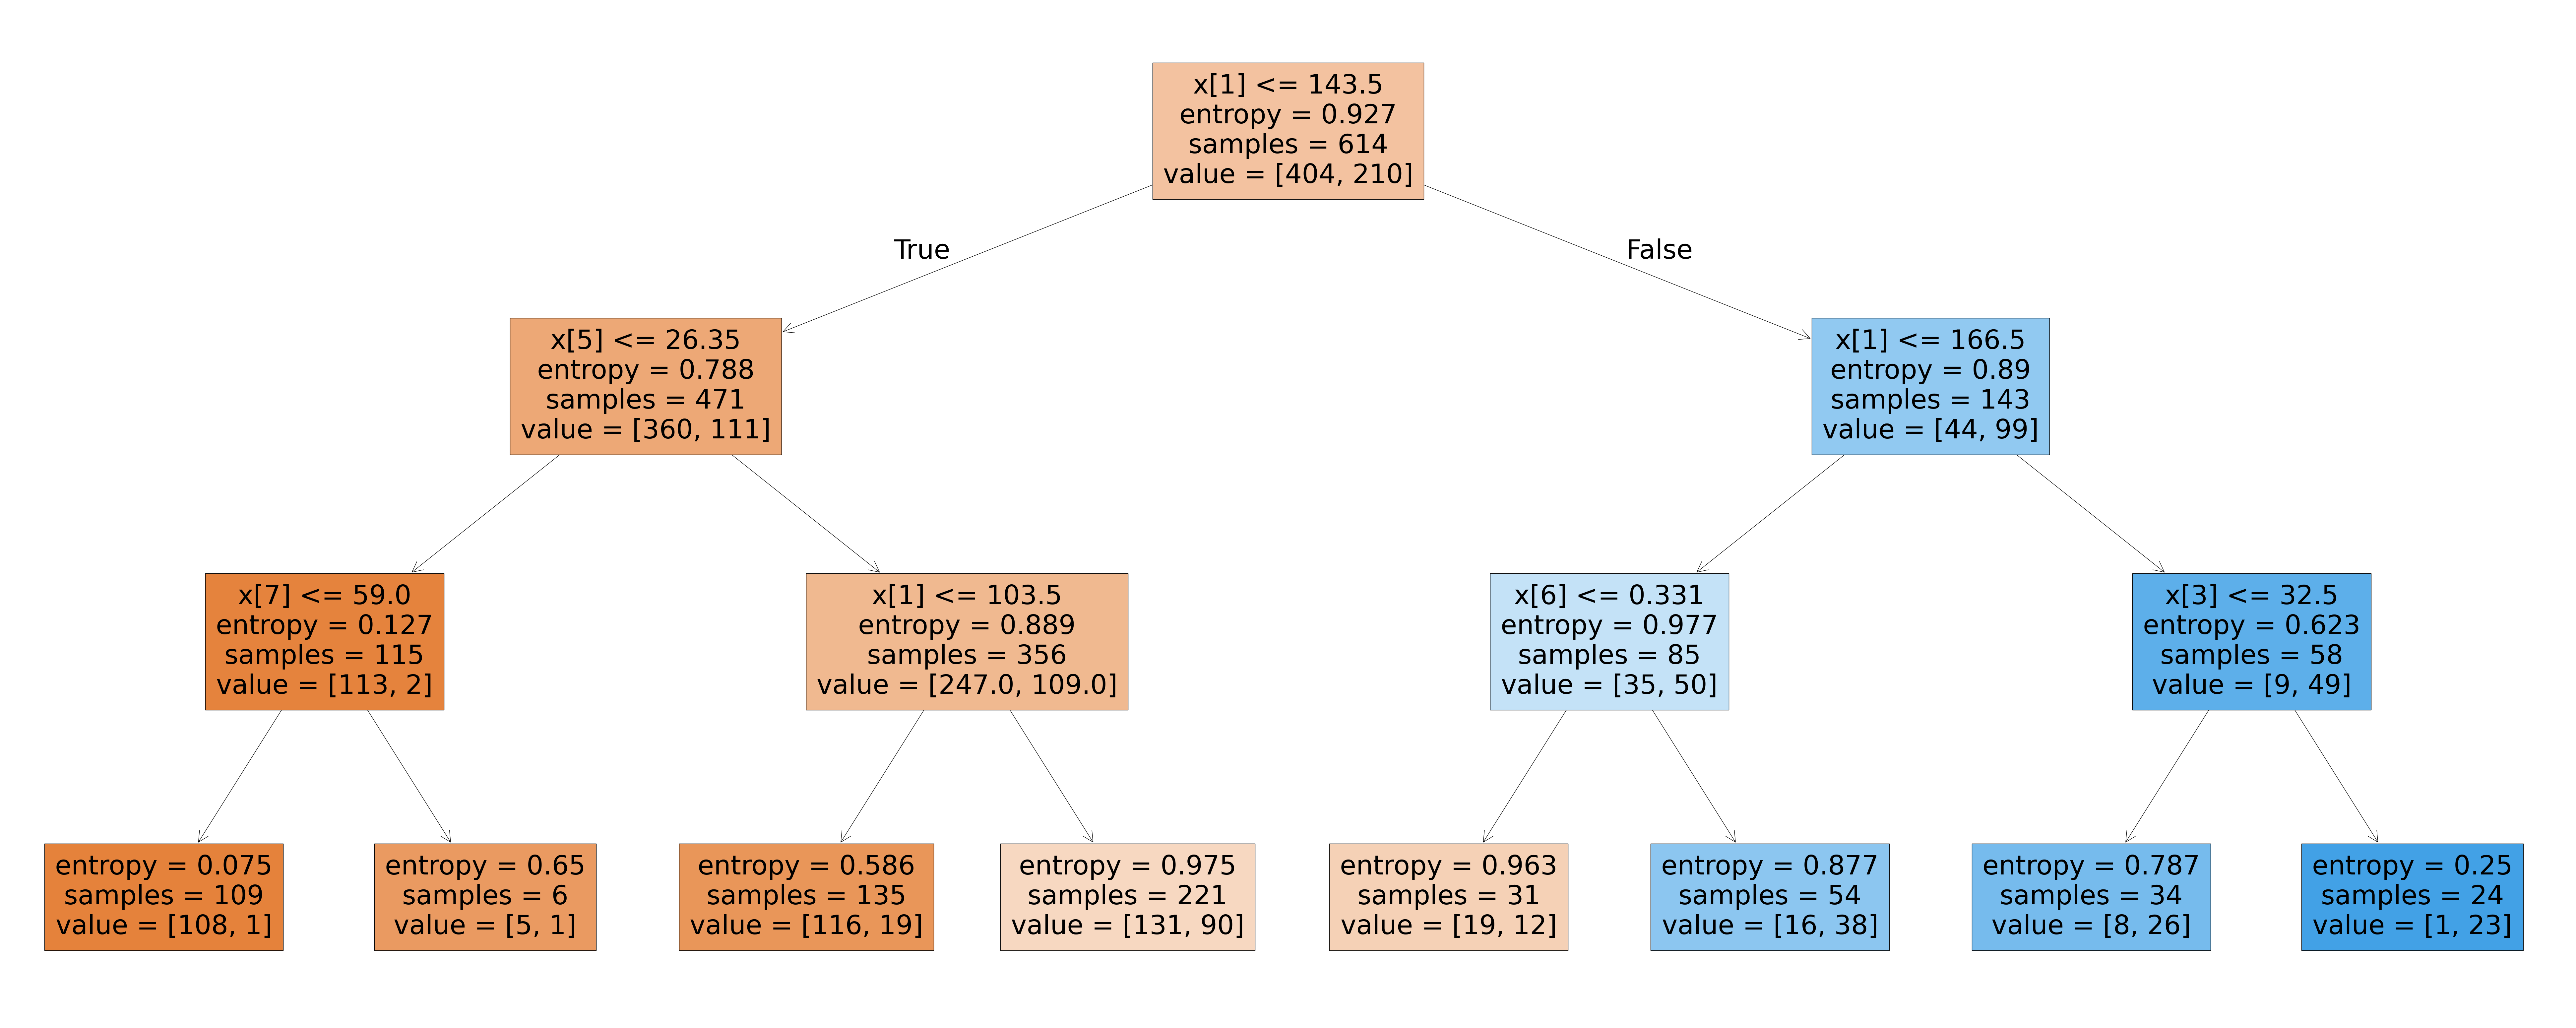

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100,40))

tree.plot_tree(dt, filled=True);

#Using Gini

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(  criterion='gini', max_depth=5, random_state=251) #Depth (generation) means branches coming out from Parent.
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=251)

### Result on Train Dataset

In [25]:
# Doing prediction and evaluation on Train Data
prediction_train = dt.predict(X_train)

# Actual value = y_train
# Prediction value = prediction_train
print(confusion_matrix(y_train,prediction_train))
print('*******************************************')
print(classification_report(y_train,prediction_train))

[[362  42]
 [ 61 149]]
*******************************************
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       404
           1       0.78      0.71      0.74       210

    accuracy                           0.83       614
   macro avg       0.82      0.80      0.81       614
weighted avg       0.83      0.83      0.83       614



### Result on Test Dataset

In [26]:
# Doing prediction and evaluation on Test Data
prediction_test = dt.predict(X_test)


# Actual value = y_test
# Prediction value = prediction_test
print("**********Confusion Matrix**********")
print(confusion_matrix(y_test,prediction_test))

print("**********Classification Report**********")
print(classification_report(y_test, prediction_test))

**********Confusion Matrix**********
[[82 14]
 [19 39]]
**********Classification Report**********
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        96
           1       0.74      0.67      0.70        58

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.78      0.79      0.78       154



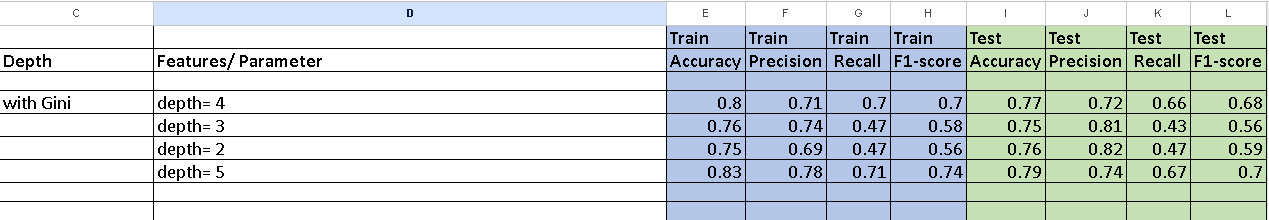